In [67]:
#Importing libraries esp requests
import requests
import pandas as pd 
import matplotlib.pyplot as plt

#Listing all urls to call here
dayone = "https://api.covid19api.com/dayone/country/singapore"
todayglobalsummary = "https://api.covid19api.com/summary" 
sgdailycases = "https://api.covid19api.com/dayone/country/singapore/status/confirmed/live" 
sgrunningtotal = "https://api.covid19api.com/total/dayone/country/singapore/status/confirmed"


In [68]:
response = requests.request("GET", dayone)

singapore = pd.DataFrame(response.json())

#Returns Cumulative Total for Singapore for all confirmed/active/deaths/recovered cases each day beginning 01 Jan 2020 
singapore

,ID,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date
0,f1471591-909d-4c12-9e8b-26ce43fa3b4e,Singapore,SG,,,,1.35,103.82,1,0,0,1,2020-01-23T00:00:00Z
1,ad7bf6e4-27b0-46e9-bdc5-998458be7e6c,Singapore,SG,,,,1.35,103.82,3,0,0,3,2020-01-24T00:00:00Z
2,25bb999d-2443-4505-925d-27f21af143f6,Singapore,SG,,,,1.35,103.82,3,0,0,3,2020-01-25T00:00:00Z
3,297dd8d4-5417-4922-9ac9-a93b9902d4c8,Singapore,SG,,,,1.35,103.82,4,0,0,4,2020-01-26T00:00:00Z
4,bee2a95e-2cf6-46e5-b2a5-9f4b4cca9613,Singapore,SG,,,,1.35,103.82,5,0,0,5,2020-01-27T00:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,aeeb6a9f-a249-4594-aa60-a7afbe735a9c,Singapore,SG,,,,1.35,103.82,267150,735,0,266415,2021-12-02T00:00:00Z
680,691eaac8-5a1c-46f0-b532-199607de0e93,Singapore,SG,,,,1.35,103.82,267916,744,0,267172,2021-12-03T00:00:00Z
681,a6c9290f-66cb-4395-972a-54d27c5acf05,Singapore,SG,,,,1.35,103.82,268659,746,0,267913,2021-12-04T00:00:00Z
682,3edd9b12-f2e3-413e-8625-a9661bf66388,Singapore,SG,,,,1.35,103.82,269211,759,0,268452,2021-12-05T00:00:00Z


In [69]:
singapore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           684 non-null    object
 1   Country      684 non-null    object
 2   CountryCode  684 non-null    object
 3   Province     684 non-null    object
 4   City         684 non-null    object
 5   CityCode     684 non-null    object
 6   Lat          684 non-null    object
 7   Lon          684 non-null    object
 8   Confirmed    684 non-null    int64 
 9   Deaths       684 non-null    int64 
 10  Recovered    684 non-null    int64 
 11  Active       684 non-null    int64 
 12  Date         684 non-null    object
dtypes: int64(4), object(9)
memory usage: 69.6+ KB


In [70]:
singapore.dtypes

ID             object
Country        object
CountryCode    object
Province       object
City           object
CityCode       object
Lat            object
Lon            object
Confirmed       int64
Deaths          int64
Recovered       int64
Active          int64
Date           object
dtype: object

In [71]:
singapore['Date'] = pd.to_datetime(singapore['Date'], infer_datetime_format=True)
singapore = singapore.set_index('Date') 
singapore = singapore.drop(['Province','City','CityCode','CountryCode','Lat','Lon'],axis = 1)
singapore

,ID,Country,Confirmed,Deaths,Recovered,Active
Date,,,,,,
2020-01-23,f1471591-909d-4c12-9e8b-26ce43fa3b4e,Singapore,1,0,0,1
2020-01-24,ad7bf6e4-27b0-46e9-bdc5-998458be7e6c,Singapore,3,0,0,3
2020-01-25,25bb999d-2443-4505-925d-27f21af143f6,Singapore,3,0,0,3
2020-01-26,297dd8d4-5417-4922-9ac9-a93b9902d4c8,Singapore,4,0,0,4
2020-01-27,bee2a95e-2cf6-46e5-b2a5-9f4b4cca9613,Singapore,5,0,0,5
...,...,...,...,...,...,...
2021-12-02,aeeb6a9f-a249-4594-aa60-a7afbe735a9c,Singapore,267150,735,0,266415
2021-12-03,691eaac8-5a1c-46f0-b532-199607de0e93,Singapore,267916,744,0,267172
2021-12-04,a6c9290f-66cb-4395-972a-54d27c5acf05,Singapore,268659,746,0,267913


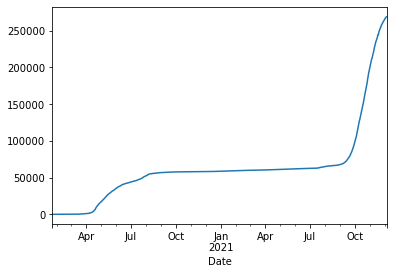

In [72]:
singapore['Confirmed'].plot()


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000237AC7F9B38>,
      dtype=object)

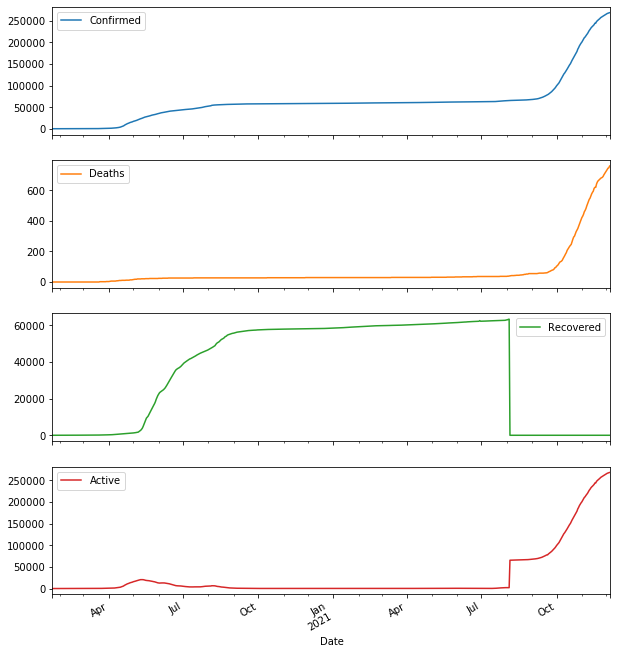

In [73]:
singapore.plot(subplots=True, figsize=(10,12))

In [74]:
#Header okay not bad but now i want to find Daily Cases not just cumulative 
